In [1]:
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime # import time -> time.sleep(5)
import time
import re

<br>
<br>

## 1. 뉴스 검색 결과에서 네이버뉴스 추려내기

In [ ]:
https://search.naver.com/search.naver
    ?
    # Query
    where=news&
    sm=tab_jum&
    query=보람튜브

In [3]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query

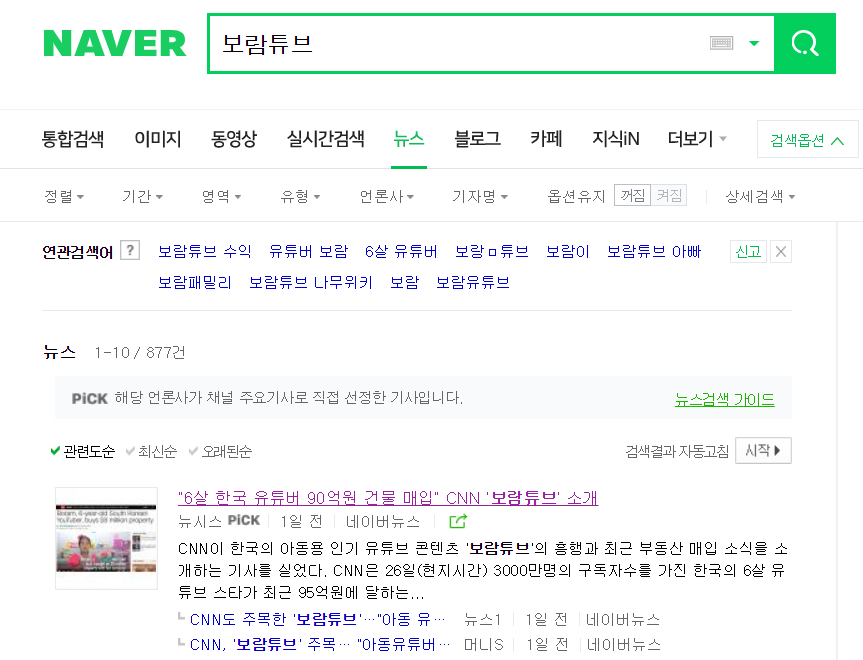

In [ ]:
# web = urlopen(url)
# print(web)

In [ ]:
# web = requests.get(url).content
# print(web)

In [5]:
# HTTP == HyperText Transfer Protocol
# HTTP Request & Response
# HTTP Request <- GET, POST, PUT, DELETE 

web = requests.get(url).content

source = BeautifulSoup(web, 'html.parser')

# print(source) # source를 그대로 출력할 경우, 담고 있는 텍스트가 무척 많아서 버벅이게 될 수 있습니다.

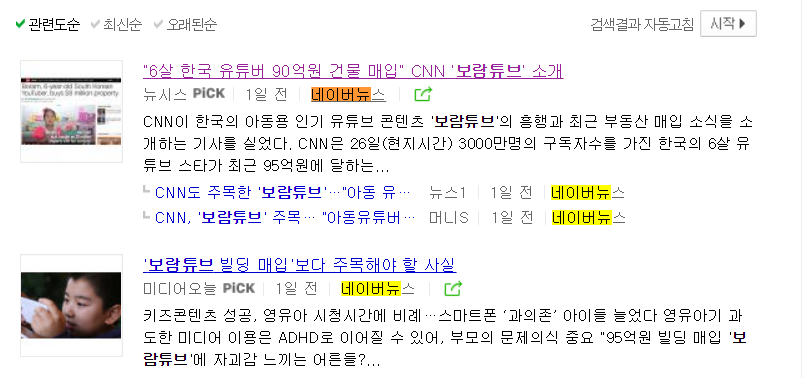

In [6]:

news_subjects = source.find_all('a', {'class' : '_sp_each_title'}) # ResultSet (리스트와 유사한 형태)
news_subjects

[<a class="_sp_each_url _sp_each_title" href="http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=1&amp;i=8813C2F5_000000000000000000050830&amp;g=5253.0000050830&amp;u='+urlencode(this.href));" target="_blank" title="[줍줍]제 2의 보람튜브? 꿈 깨세요">[줍줍]제 2의 <strong class="hl">보람튜브</strong>? 꿈 깨세요</a>,
 <a class="_sp_each_title" href="http://news.kbs.co.kr/news/view.do?ncd=4340352&amp;ref=A" onclick="return goOtherCR(this, 'a=nws*e.tit&amp;r=2&amp;i=88000114_000000000000000010771978&amp;g=056.0010771978&amp;u='+urlencode(this.href));" target="_blank" title="“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’">“유치원에서 유<strong class="hl">튜브</strong> 가르쳐요” 초등생 장래희망 3위 ‘유튜버’</a>,
 <a class="_sp_each_title" href="http://www.segye.com/content/html/2019/12/06/20191206510151.html?OutUrl=naver" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=3&amp;i=880000D2_000000000000000003420297&amp;g=022.0003420297&amp;u='+urlencode(this.href));" target="_blank" tit

In [7]:
# 네이버에서 "보람튜브"를 검색한 후 뉴스 탭의 1번째 페이지(위 url 변수의 URL에 해당)에 나타나 있는 뉴스들의 "제목"을 크롤링해주세요. 
# 텍스트만 뽑아내어 하나의 리스트로 모아 저장해주세요. (ex. 위 스크린샷에서 ["6살 한국 유튜버 90억원 건물 매입" CNN '보람튜브' 소개])

news_subjects = source.find_all('a', {'class' : '_sp_each_title'}) # ResultSet (리스트와 유사한 형태)

subject_list = []

for subject in news_subjects:
    subject_list.append(subject.get_text())

print(subject_list)

['[줍줍]제 2의 보람튜브? 꿈 깨세요', '“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’', '돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]', "'미디어 시장 장악'… 유튜브의 3가지 성공비결", "보람패밀리 '보람튜브' 최다 구독자 보유 키즈 인기 채널 등극", "보람패밀리, '보람튜브' 3천만명에 이르는 구독자..그 인기 비결은?", '롯데월드 아쿠아리움 X 보람튜브 콜라보 영상 공개', '주렁주렁X보람튜브 콜라보, 주렁주렁송과 함께 선보여', '‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?', "'보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익"]


In [11]:
first_article

<a class="_sp_each_url _sp_each_title" href="http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=1&amp;i=8813C2F5_000000000000000000050830&amp;g=5253.0000050830&amp;u='+urlencode(this.href));" target="_blank" title="[줍줍]제 2의 보람튜브? 꿈 깨세요">[줍줍]제 2의 <strong class="hl">보람튜브</strong>? 꿈 깨세요</a>

In [12]:
urls = news_subjects
first_article = urls[0]
first_article.attrs['href'] # tag's attributes (== attrs)

'http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver'

In [11]:
first_article.?[?] # tag의 attribute 'href'의 value 꺼내기

'http://www.namdonews.com/news/articleView.html?idxno=539492'

In [13]:
for urls in source.find_all('a', {'class' : "_sp_each_title"}):
    print(urls.attrs['href'])

http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver
http://news.kbs.co.kr/news/view.do?ncd=4340352&ref=A
http://www.segye.com/content/html/2019/12/06/20191206510151.html?OutUrl=naver
http://www.sisaweek.com/news/articleView.html?idxno=128831
http://www.woodkorea.co.kr/news/articleView.html?idxno=35601
http://www.woodkorea.co.kr/news/articleView.html?idxno=35139
http://newsbrite.net/129512
http://www.woodkorea.co.kr/news/articleView.html?idxno=33697
http://www.donga.com/news/article/all/20191001/97682290/1
https://news.imaeil.com/Culture/2019102521261894434


In [14]:
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    print(urls.attrs['href'])

http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297
http://www.sisaweek.com/news/articleView.html?idxno=128831
http://www.woodkorea.co.kr/news/articleView.html?idxno=35601
http://www.woodkorea.co.kr/news/articleView.html?idxno=35139
http://newsbrite.net/129512
http://www.woodkorea.co.kr/news/articleView.html?idxno=33697
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683


In [16]:
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    print(urls['href'])

http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297
http://www.sisaweek.com/news/articleView.html?idxno=128831
http://www.woodkorea.co.kr/news/articleView.html?idxno=35601
http://www.woodkorea.co.kr/news/articleView.html?idxno=35139
http://newsbrite.net/129512
http://www.woodkorea.co.kr/news/articleView.html?idxno=33697
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683


In [17]:
sentence = 'multicampus is good'
sentence.startswith('multi')

True

In [18]:
sample_url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=014&aid=0004286058'
sample_url.startswith('https://news.naver.com/')

True

In [19]:
urls_list = []

for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls.attrs["href"].startswith("https://news.naver.com"): # starts with ~~~
        urls_list.append(urls["href"])

urls_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683']

<br>
<br>

## 2. 단일 뉴스 페이지 분석하기

In [20]:
print(urls_list[0])

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978


In [22]:
web_news = requests.get(urls_list[0]).content
source_news = BeautifulSoup(web_news, 'html.parser')

<br>
<br>

#### 1) 기사 제목 & 발행 날짜

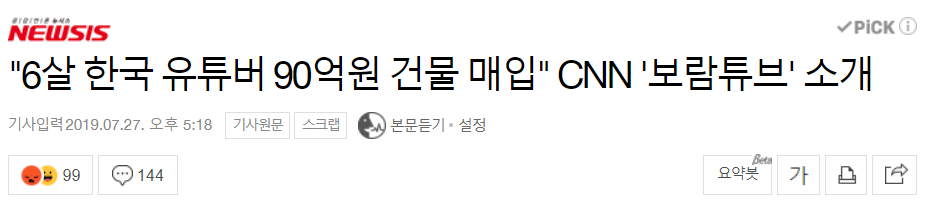

In [23]:
title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
print(title)

“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’


In [31]:
date

'2019.12.10. 오후 5:17'

In [30]:
date.replace(" ","")[13:]

'5:17'

In [ ]:
def random_func(x):
    if x == '오전':
        return 'am'
    else:
        return 'pm'

In [ ]:
date3 = random_func(date[11:13])
date3 = (lambda x : 'am' if x == '오전' else 'pm')(date[11:13])

In [33]:
date = date.replace(" ","")
date1 = date[:11] # 날짜까지 파싱
date2 = date[13:] # 시간부분 파싱
date3 = (lambda x : 'am' if x == '오전' else 'pm')(date[11:13])
date4 = date1 + date2 + date3
date4

'2019.12.10.5:17pm'

In [34]:
date = source_news.find('span', {'class' : 't11'}).get_text()

date = date.replace(" ","")
date1 = date[:11] # 날짜까지 파싱
date2 = date[13:] # 시간부분 파싱
date3 = (lambda x : 'am' if x == '오전' else 'pm')(date[11:13])
date4 = date1 + date2 + date3

date = pd.Timestamp(date4)

print(date)

2019-12-10 17:17:00


In [ ]:
# random_func = lambda x : 'am' if x == '오전' else 'pm'

In [ ]:
# def random_func(x):
#     if x == '오전':
#         return 'am'
#     else:
#         return 'pm'

<br>
<br>

#### 2) 기사 본문

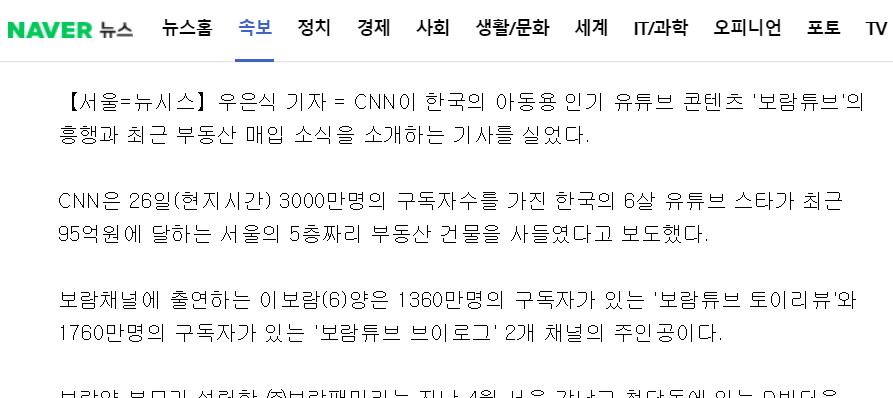

In [35]:
# ArticleBodyContents -> CamelCase (Python에서는 보통 클래스명에만 사용)
# article_body_contents -> snake_case

article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
article
# print(article)

'\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n "그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 골방에 쳐박혀서 맨날 그것만 하고 있는 겨? 언제 그런 거 해서 입에 풀칠이나 하겠느냐고, 어?"최근 방영 중인 한 자동차 광고 내용 중 일부입니다. 고향 집에 오고 있는 아들에게 어머니가 전화를 걸어 이런 잔소리를 하는 건데요. 실제 이런 어머니가 계신다면 이렇게 얘기해드리고 싶네요.\'어머니, 입에 풀칠 정도가 아니라 건물을 사던데요?\'수천만 명이라는 엄청난 구독자를 보유한 유튜브 채널 \'보람튜브\'의 경우, 6살의 보람양이 콘텐츠 크리에이터로 활약하며 \'키즈 유튜브 크리에이터\' 시대를 열었다는 평가도 있었습니다. 유튜브 채널 ‘보람튜브’ 캡처 월수익만 평균 20억 원 대, 최근에는 보람튜브의 가족 회사 \'보람패밀리\'가 청담동에 95억 원대 빌딩을 매입해서 화제가 되기도 했죠. 이런 이유들 때문일까요? 오늘(10일) 발표된 정부의 학생 장래희망 직업 순위 결과가 눈길을 끕니다.\'크리에이터\', 가수·의사·경찰·프로게이머까지 제치고 초등생 장래희망 3위 등극!교육부와 한국직업능력개발원은 전국 1,200개 초·중·고교생 24,000여 명과 학부모, 교원들을 대상으로 \'초·중등 진로교육 현황조사\' 결과 희망직업 순위를 발표했는데요.  초등학생 희망직업 1위는 지난해에 이어 올해도 운동선수로 11.6%를 차지했습니다. 항상 상위권에 있던 교사는 재작년까지는 1위를 유지했지만, 지난해에 2위로 밀렸고 올해도 6.9%, 2위를 차지했습니다.그런데 역시 눈에 띄는 것은 3위에 오른 \'크리에이터\'이지요? 유튜버나 BJ를 일컫는 용어로, 초등생 응답자의 5.7%가 크리에이터를 선호했습니다.유튜버라는 직업은 지난해 조사에서 5위에 등극해 처음으로 10위권에 들었는데요, 이번에는 두 계단 껑충 뛴 3위를 차지한 겁니다."유치원에서도 유튜

In [36]:
article = article.replace("\n", "") # 교체하다
article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
article = article.replace("동영상 뉴스       ", "")
article = article.strip()
article

'"그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 골방에 쳐박혀서 맨날 그것만 하고 있는 겨? 언제 그런 거 해서 입에 풀칠이나 하겠느냐고, 어?"최근 방영 중인 한 자동차 광고 내용 중 일부입니다. 고향 집에 오고 있는 아들에게 어머니가 전화를 걸어 이런 잔소리를 하는 건데요. 실제 이런 어머니가 계신다면 이렇게 얘기해드리고 싶네요.\'어머니, 입에 풀칠 정도가 아니라 건물을 사던데요?\'수천만 명이라는 엄청난 구독자를 보유한 유튜브 채널 \'보람튜브\'의 경우, 6살의 보람양이 콘텐츠 크리에이터로 활약하며 \'키즈 유튜브 크리에이터\' 시대를 열었다는 평가도 있었습니다. 유튜브 채널 ‘보람튜브’ 캡처 월수익만 평균 20억 원 대, 최근에는 보람튜브의 가족 회사 \'보람패밀리\'가 청담동에 95억 원대 빌딩을 매입해서 화제가 되기도 했죠. 이런 이유들 때문일까요? 오늘(10일) 발표된 정부의 학생 장래희망 직업 순위 결과가 눈길을 끕니다.\'크리에이터\', 가수·의사·경찰·프로게이머까지 제치고 초등생 장래희망 3위 등극!교육부와 한국직업능력개발원은 전국 1,200개 초·중·고교생 24,000여 명과 학부모, 교원들을 대상으로 \'초·중등 진로교육 현황조사\' 결과 희망직업 순위를 발표했는데요.  초등학생 희망직업 1위는 지난해에 이어 올해도 운동선수로 11.6%를 차지했습니다. 항상 상위권에 있던 교사는 재작년까지는 1위를 유지했지만, 지난해에 2위로 밀렸고 올해도 6.9%, 2위를 차지했습니다.그런데 역시 눈에 띄는 것은 3위에 오른 \'크리에이터\'이지요? 유튜버나 BJ를 일컫는 용어로, 초등생 응답자의 5.7%가 크리에이터를 선호했습니다.유튜버라는 직업은 지난해 조사에서 5위에 등극해 처음으로 10위권에 들었는데요, 이번에는 두 계단 껑충 뛴 3위를 차지한 겁니다."유치원에서도 유튜브 크리에이터 수업을 하는데요. 뭘"인기 선호 직업으로 꼽히는 만큼 교육 문의도 많다고 합니다. 전국에 수많은 유튜브, 크리에이터 전문 교육

In [118]:
article

'【서울=뉴시스】CNN이 27일 한국의 인기 아동 유튜브 콘텐츠 \'보람채널\'의 흥행을 소개하는 기사를 실었다. 사진은 CNN 인터넷판 보도내용을 갈무리한 것이다. 2019.07.27【서울=뉴시스】우은식 기자 = CNN이 한국의 아동용 인기 유튜브 콘텐츠 \'보람튜브\'의 흥행과 최근 부동산 매입 소식을 소개하는 기사를 실었다.CNN은 26일(현지시간) 3000만명의 구독자수를 가진 한국의 6살 유튜브 스타가 최근 95억원에 달하는 서울의 5층짜리 부동산 건물을 사들였다고 보도했다. 보람채널에 출연하는 이보람(6)양은 1360만명의 구독자가 있는 \'보람튜브 토이리뷰\'와 1760만명의 구독자가 있는 \'보람튜브 브이로그\' 2개 채널의 주인공이다. 보람양 부모가 설립한 ㈜보람패밀리는 지난 4월 서울 강남구 청담동에 있는 D빌딩을 95억원에 사들인 것으로 알려졌다.  부동산 업계와 인터넷등기소에 따르면 보람패밀리는 대지면적 258.3㎡에 지하 1층, 지상 5층 규모의 빌딩을 단독으로 매입했다. CNN은 보람튜브가 지난 2017년 일부 콘텐츠가 아동들의 정서와 윤리에 악영향을 미친다며 소송을 당한 사실을 소개하기도 했다. 유튜브 분석사이트인 소셜블레이드에 따르면 보람패밀리는 \'보람튜브 토이리뷰\'와 \'보람튜브 브이로그\' 등 2개 채널을 통해 각각 월 160만달러(19억원)와 150만달러(17억8000만원) 등 총 37억원 이상의 광고매출을 내는 등 국내 유튜브 콘텐츠 중 가장 많은 광고수익을 올리는 것으로 알려졌다.  포브스에 따르면 지난해 가장 많은 수입을 올린 유튜버는 라이언 토이즈리뷰의 진행자 라이언 카지(7)로 그 역시 7살 소년이었다. 라이언은 지난해 2080만명의 구독자수를 기록하며 2200만달러(260억6000만원)를 벌어들였다. 미 가족 유튜브 채널 \'트라브&코\'에 출연하는 아동 유튜브 스타 타이더스(5)는 310만명의 구독자수를 기록하고 있다. 유튜버는 비디오 콘텐츠에 삽입되는 광고 수익과 함께 제품 노출, 브랜드 제휴 등 다양한 방법

In [38]:
# # (Appendix) 불필요한 기호와 기자 이메일 주소 등 삭제하기 

news_contents = article


# re.match(r'[a-zA-Z]+', TEXT_) : a~z 혹은 A~Z 중 1개 혹은 그 이상
# + : 1 OR MORE
# * : 0 OR MORE

pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@') # [white-space, anti-alphanumeric, lower/upper, numeric] 중에서 0 or more + "@"
email_address = pattern.search(article)

print(email_address)
print(email_address.start())

# print(email_address.start())
# print(news_contents[:email_address.start()])

<re.Match object; span=(2089, 2096), match=' (okok@'>
2089


In [ ]:
# 1) "\'" 기호 삭제하기 
pattern = re.compile(r'\'') 
news_contents = pattern.sub('', news_contents)

# 2) 기자 이메일 주소부터 그 이후 전체 삭제하기
pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@')  # 정규표현식 상세 설명 @ http://j.mp/2PzgFO8
email_address = pattern.search(news_contents) # span=(2089, 2096), match=' (okok@'
news_contents = news_contents[:email_address.start()]

print(news_contents)

<br>
<br>

#### 3) 기사 발행 언론사

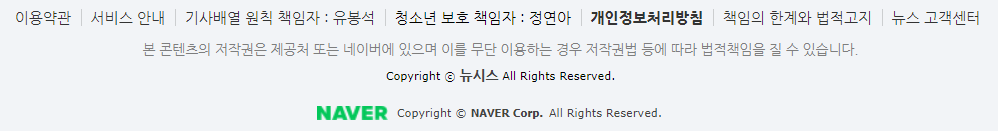

In [39]:
press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
print(press_company)

KBS


<br>
<br>

## 3-1. 여러 뉴스 데이터 모으기

In [40]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []

for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls.attrs["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

urls_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683']

In [41]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [42]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

# 1) 네이버 뉴스만 추려내기
urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list: # url == "네이버 뉴스" URL
    web_news = requests.get(url).content
    source_news = BeautifulSoup(web_news, 'html.parser')

    # 2) 기사 제목 
    title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
    titles.append(title)
    print('Processing article : {}'.format(title))
    
    # 3) 기사 날짜
    date = source_news.find('span', {'class' : 't11'}).get_text()
    dates.append(date)

    # 4) 기사 본문
    article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
    article = article.replace("\n", "")
    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
    article = article.replace("동영상 뉴스       ", "")
    article = article.strip()
    articles.append(article)
    
    # 5) 기사 URL 
    article_urls.append(url)
    
    # 6) 기사 발행 언론사
    press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
    press_companies.append(press_company)

Processing article : “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’
Processing article : 돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]
Processing article : ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?
Processing article : '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익


In [43]:
# 결과 체크 

print(press_companies)

['KBS', '세계닷컴', 'donga.com', '매일신문']


In [44]:
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})
article_df.to_excel(~~~)

,Title,Date,Article,URL,PressCompany
0,“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’,2019.12.10. 오후 5:17,"""그런 거 해서 입에 풀칠이나 하겠냐고..."" ""야, 뭐시냐 그 개인방송인지 뭔지 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,KBS
1,돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리],2019.12.08. 오전 11:36,논란 부르는 ‘불량 유튜버’ / 구독자 50만명 보유 조폭출신 유튜버 / 지인에 권...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴
2,"‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?",2019.10.01. 오후 6:19,"동아일보 DB그동안 ‘아동학대’, ‘불건전한 콘텐츠’라며 논란이 있었던 키즈 유튜버...",https://news.naver.com/main/read.nhn?mode=LSD&...,donga.com
3,'보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익,2019.10.25. 오후 9:27,"국내 TOP20 개인유튜버 구독자 순위, 월 수익 공개 l 안성완 영상기자 asw0...",https://news.naver.com/main/read.nhn?mode=LSD&...,매일신문


In [ ]:
from datetime import datetime

In [46]:
print(datetime.now())
print(datetime.now().strftime('%y%m%d_%H%M')) # string format time

2019-12-13 14:05:39.632596
191213_1405


In [ ]:
datetime.now().strftime('%y%m%d_%H%M')

In [47]:
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.

article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

,Title,Date,Article,URL,PressCompany
0,“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’,2019.12.10. 오후 5:17,"""그런 거 해서 입에 풀칠이나 하겠냐고..."" ""야, 뭐시냐 그 개인방송인지 뭔지 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,KBS
1,돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리],2019.12.08. 오전 11:36,논란 부르는 ‘불량 유튜버’ / 구독자 50만명 보유 조폭출신 유튜버 / 지인에 권...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴
2,"‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?",2019.10.01. 오후 6:19,"동아일보 DB그동안 ‘아동학대’, ‘불건전한 콘텐츠’라며 논란이 있었던 키즈 유튜버...",https://news.naver.com/main/read.nhn?mode=LSD&...,donga.com
3,'보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익,2019.10.25. 오후 9:27,"국내 TOP20 개인유튜버 구독자 순위, 월 수익 공개 l 안성완 영상기자 asw0...",https://news.naver.com/main/read.nhn?mode=LSD&...,매일신문


<br>
<br>

## 3-2. 여러 뉴스 데이터 모으기 (특정 뉴스 웹페이지 크롤링 중 에러 발생 시 회피)

In [48]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

# 1) 네이버 뉴스만 추려내기
urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

error_urls = []
for url in urls_list:
    try:
        web_news = requests.get(url).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        # 2) 기사 제목 
        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        print('Processing article : {}'.format(title))

        # 3) 기사 날짜
        date = source_news.find('span', {'class' : 't11'}).get_text()

        # 4) 기사 본문
        article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
        article = article.replace("\n", "")
        article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
        article = article.replace("동영상 뉴스       ", "")
        article = article.strip()
        
        # 5) 기사 발행 언론사
        press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
        
        # 위 2~5를 통해 성공적으로 제목/날짜/본문/언론사 정보가 모두 추출되었을 때에만 리스트에 추가해 길이를 동일하게 유지해줍니다.
        titles.append(title)
        dates.append(date)
        articles.append(article)
        press_companies.append(press_company)
        article_urls.append(url) # 6) 기사 URL 
    
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        error_urls.append(url)

# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모아둡니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

Processing article : “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’
Processing article : 돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]
Processing article : ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?
Processing article : '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익


,Title,Date,Article,URL,PressCompany
0,“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’,2019.12.10. 오후 5:17,"""그런 거 해서 입에 풀칠이나 하겠냐고..."" ""야, 뭐시냐 그 개인방송인지 뭔지 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,KBS
1,돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리],2019.12.08. 오전 11:36,논란 부르는 ‘불량 유튜버’ / 구독자 50만명 보유 조폭출신 유튜버 / 지인에 권...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴
2,"‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?",2019.10.01. 오후 6:19,"동아일보 DB그동안 ‘아동학대’, ‘불건전한 콘텐츠’라며 논란이 있었던 키즈 유튜버...",https://news.naver.com/main/read.nhn?mode=LSD&...,donga.com
3,'보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익,2019.10.25. 오후 9:27,"국내 TOP20 개인유튜버 구독자 순위, 월 수익 공개 l 안성완 영상기자 asw0...",https://news.naver.com/main/read.nhn?mode=LSD&...,매일신문
4,“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’,2019.12.10. 오후 5:17,"""그런 거 해서 입에 풀칠이나 하겠냐고..."" ""야, 뭐시냐 그 개인방송인지 뭔지 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,KBS


<br>
<br>

## 4. 여러 페이지에 걸쳐 크롤링하기

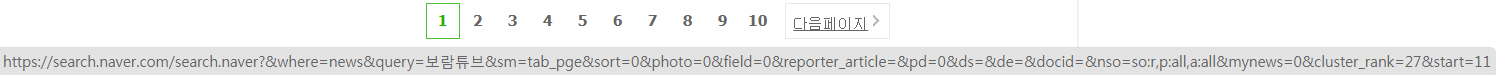

In [ ]:
https://search.naver.com/search.naver
    ?
    &
    where=news&
    query=보람튜브&
    sm=tab_pge&
    sort=0&
    photo=0&
    field=0&
    reporter_article=&
    pd=0&
    ds=&
    de=&
    docid=&
    nso=so:r,p:all,a:all&
    mynews=0&
    cluster_rank=11&
    start=11&
    refresh_start=0

In [49]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query + '&start=' + str(11) # 2 페이지
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    try:
        web_news = requests.get(url).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        titles.append(title)
        print(title)
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

보람튜브 "보람 양 정기적 아동심리 상담 받아.. 학대 없다"
보람튜브, '그것이 알고싶다' 반박…"아동보호 가이드 준수" [전문]
보람튜브 해명 "월 37억 원 수입, 명백하게 과장된 수치"
‘꼬마 유튜버 돈방석’ 이제 옛말? 맞춤광고 금지에 울상
[ONE SHOT] 대한민국 ‘파워 유튜버’…어떤 콘텐트로 얼마나 벌까?
월 37억 벌던 '보람튜브' 광고수입 확 준다
아동학대가 자초한 ‘철퇴’… 인권보호 새 지침 필요
‘보람튜브’ 보람패밀리, 95억 빌딩 매입…月수입 얼마기에?
6세 유튜버 '보람튜브' 가족회사, 95억원 대 강남 빌딩 매입


In [50]:
page_indicator = [11, 21, 31, 41, 51]

query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query + '&start=' + str(21) # 3 페이지
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    try:
        web_news = requests.get(url).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        titles.append(title)
        print(title)
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

'월 40억 수익' 6세 유튜버 '보람튜브'.. 강남 빌딩 매입
95억 빌딩 산 '보람튜브' 6살 유튜버 가족, 월매출 보니
강남 빌딩 매입한 6살 유튜버 ‘보람튜브’ 광고 수익
'보람튜브' 6살 유튜버 보람이 가족회사, 95억 빌딩 매입…국내 광고수익 1위
6살 유튜버 둔 '보람패밀리', 청담동 5층 건물 95억에 매입
유튜브 수익으로 95억 빌딩 산 보람튜브...과거 아동학대 논란도 재조명 
95억 빌딩 매입 ‘보람튜브’가 뭐길래···광고 수익 1위 채널, 아동학대로 고발 당하기도
"6세 아이가 임신·출산을?" 보람튜브, 도 넘은 콘텐츠로 과거 논란
"아이 이용해 돈벌이" '보람튜브' 과거 아동학대로 고발 당해
95억 빌딩 산 ‘보람튜브’ 아동학대 논란도
6살 유튜버 번 돈으로 95억 빌딩 매입...'보람튜브' 비결은?
95억 강남 빌딩 산 6세 유튜버···'보람튜브' 한달 얼마 벌길래
강남 95억 빌딩 매입한 6세 유튜버 '보람튜브', 인기 이유는?
[생글기자 코너] 유튜브·1인 미디어 시대의 빛과 그림자
"보람튜브, 날로 먹은 것 아냐.. 아무나 유튜브해선 안돼"
"6살 한국 유튜버 90억원 건물 매입" CNN '보람튜브' 소개
[필동정담] "유튜버가 꿈"


In [51]:
query = '보람튜브'
max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [52]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [53]:
current_call = 1

last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    print(current_call) # 1, 11, 21, 31, 41 
    
    
    current_call += 10

# current_call 1 <= 41
# current_call 11 <= 41
# current_call 21 <= 41
# current_call 31 <= 41
# current_call 41 <= 41
# current_call 51 <= 41 <- False & 종료

1
11
21
31
41


In [54]:
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call: # 조건문이 참인 "동안" 실행
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query + "&start=" + str(current_call)
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    error_urls = []
    for url in urls_list:
        try:
            web_news = requests.get(url).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            error_urls.append(url)
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()


1번째 기사글부터 크롤링을 시작합니다.
Processing article : “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’
Processing article : 돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]
Processing article : ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?
Processing article : '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익

11번째 기사글부터 크롤링을 시작합니다.
Processing article : 보람튜브 "보람 양 정기적 아동심리 상담 받아.. 학대 없다"
Processing article : 보람튜브, '그것이 알고싶다' 반박…"아동보호 가이드 준수" [전문]
Processing article : 보람튜브 해명 "월 37억 원 수입, 명백하게 과장된 수치"
Processing article : ‘꼬마 유튜버 돈방석’ 이제 옛말? 맞춤광고 금지에 울상
Processing article : [ONE SHOT] 대한민국 ‘파워 유튜버’…어떤 콘텐트로 얼마나 벌까?
Processing article : 월 37억 벌던 '보람튜브' 광고수입 확 준다
Processing article : 아동학대가 자초한 ‘철퇴’… 인권보호 새 지침 필요
Processing article : ‘보람튜브’ 보람패밀리, 95억 빌딩 매입…月수입 얼마기에?
Processing article : 6세 유튜버 '보람튜브' 가족회사, 95억원 대 강남 빌딩 매입

21번째 기사글부터 크롤링을 시작합니다.
Processing article : '월 40억 수익' 6세 유튜버 '보람튜브'.. 강남 빌딩 매입
Processing article : 95억 빌딩 산 '보람튜브' 6살 유튜버 가족, 월매출 보니
Processing article : 강남 빌딩 매입한 6살 유튜버 ‘보람튜브’ 광고 수익
Processing article : '보람튜브' 6살 유튜버 보람이 가

,Title,Date,Article,URL,PressCompany
0,“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’,2019.12.10. 오후 5:17,"""그런 거 해서 입에 풀칠이나 하겠냐고..."" ""야, 뭐시냐 그 개인방송인지 뭔지 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,KBS
1,돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리],2019.12.08. 오전 11:36,논란 부르는 ‘불량 유튜버’ / 구독자 50만명 보유 조폭출신 유튜버 / 지인에 권...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴
2,"‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?",2019.10.01. 오후 6:19,"동아일보 DB그동안 ‘아동학대’, ‘불건전한 콘텐츠’라며 논란이 있었던 키즈 유튜버...",https://news.naver.com/main/read.nhn?mode=LSD&...,donga.com
3,'보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익,2019.10.25. 오후 9:27,"국내 TOP20 개인유튜버 구독자 순위, 월 수익 공개 l 안성완 영상기자 asw0...",https://news.naver.com/main/read.nhn?mode=LSD&...,매일신문
4,"보람튜브 ""보람 양 정기적 아동심리 상담 받아.. 학대 없다""",2019.09.06. 오전 10:56,"보람패밀리 ""국내 키즈유튜브 활성화 되지 않으면 어린이 문화 고유성 침범당할 것"" ...",https://news.naver.com/main/read.nhn?mode=LSD&...,financial news


<br>
<br>

## (Appendix) 날짜 지정하여 크롤링하기

In [ ]:
https://search.naver.com/search.naver?
    where=news&query=보람튜브&sm=tab_opt&
    sort=0&
    photo=0&field=0&reporter_article=&pd=3&
    ds=2019.12.01&de=2019.12.13&
    docid=&
    nso=so%3Ar%2Cp%3Afrom20191201to20191213%2Ca%3Aall&
    mynews=0&refresh_start=0&related=0

In [55]:
query = '보람튜브'

start_date = '2019.07.20'
end_date = '2019.07.29'

max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [56]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
titles = []
dates = []
articles = []
article_urls = []
press_companies = []


# 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
start_date = start_date.replace(".", "")
end_date = end_date.replace(".", "")

# 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query \
          + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
          + "to" + end_date \
          + "%2Ca%3A&start=" + str(current_call)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            web_news = requests.get(url).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()


1번째 기사글부터 크롤링을 시작합니다.
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=052&aid=0001324674
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=022&aid=0003384613
Processing article : ‘미달이’ 김성은 “보람튜브? 부모님 원망하는 건 아니지만…”
Processing article : [김경래의 최강시사] ‘보람튜브’ 논란에 대한 미달이 김성은의 생각
Processing article : "6살 한국 유튜버 90억원 건물 매입" CNN '보람튜브' 소개
Processing article : CNN도 주목한 '보람튜브'…"아동 유튜버, 과거에도 논란"
Processing article : CNN, '보람튜브' 주목… "아동유튜버 논란 우려"
Processing article : '보람튜브 빌딩 매입'보다 주목해야 할 사실
Processing article : 보람튜브도?…어린아이가 '클릭미끼' 유튜브 조회수 '3배'
Processing article : [오태훈의 시사본부] 강남 빌딩 매입한 ‘보람튜브’ 고수익의 비밀

11번째 기사글부터 크롤링을 시작합니다.
Processing article : 유튜브 수익으로 95억 빌딩 산 보람튜브...과거 아동학대 논란도 재조명 
Processing article : 95억 빌딩 매입 ‘보람튜브’가 뭐길래···광고 수익 1위 채널, 아동학대로 고발 당하기도
Processing article : "아이 이용해 돈벌이" '보람튜브' 과거 아동학대로 고발 당해
Processing article : 95억 빌딩 산 ‘보람튜브’ 아동학대 논란도
Processing article : "6세 아이가 임신·출산을

,Title,Date,Article,URL,PressCompany
0,‘미달이’ 김성은 “보람튜브? 부모님 원망하는 건 아니지만…”,2019.07.29. 오후 9:02,1998년부터 2000년까지 방송된 SBS 시트콤 '순풍산부인과'에서 박미달 역을 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,Joins.com
1,[김경래의 최강시사] ‘보람튜브’ 논란에 대한 미달이 김성은의 생각,2019.07.29. 오전 10:18,- 8 살 때 미달이로 데뷔. 지금은 대학로 연극과 유튜브 활동- 미달이 캐릭터와 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,KBS
2,"""6살 한국 유튜버 90억원 건물 매입"" CNN '보람튜브' 소개",2019.07.27. 오후 5:18,【서울=뉴시스】CNN이 27일 한국의 인기 아동 유튜브 콘텐츠 '보람채널'의 흥행을...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
3,"CNN도 주목한 '보람튜브'…""아동 유튜버, 과거에도 논란""",2019.07.27. 오후 4:03,보람튜브 갈무리 © 뉴스1(서울=뉴스1) 이원준 기자 = 유명 유튜브 채널 '보람튜...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1
4,"CNN, '보람튜브' 주목… ""아동유튜버 논란 우려""",2019.07.27. 오후 5:39,/사진=보람튜브 유튜브채널 캡처유명 유튜브채널 ‘보람튜브’에 대해 외신들도 주목하기...,https://news.naver.com/main/read.nhn?mode=LSD&...,머니S


<br>
<br>

## (Appendix) 기사 정렬 순서 지정하여 크롤링하기

In [198]:
query = '보람튜브'

sort_type = 1 # 관련도순 = 0  최신순 = 1  오래된순 = 2

max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [ ]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
titles = []
dates = []
articles = []
article_urls = []
press_companies = []


# 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query \
          + "&sort=" + str(sort_type) \
          + "&start=" + str(current_call)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            web_news = requests.get(url).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

<br>
<br>

## (Appendix) 깔끔하게 정리하기

In [64]:
result = input()
print(type(result))


<class 'str'>


In [65]:
def main_crawling(query, start_date, end_date, sort_type, max_page):
    
    if query == '':
        query = '보람튜브'
    if len(start_date) != 10:
        start_date = '2019.07.28'
    if len(end_date) != 10:
        end_date = '2019.07.29'
    if sort_type not in ['0', '1', '2']:
        sort_type = '0'
#     if max_page == '':
#         max_page = 5


    # 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
    titles = []
    dates = []
    articles = []
    article_urls = []
    press_companies = []

    # 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
    start_date = start_date.replace(".", "")
    end_date = end_date.replace(".", "")

    # 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
    current_call = 1
    last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 


    while current_call <= last_call:

        print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))

        url = "https://search.naver.com/search.naver?where=news&query=" + query \
              + "&sort=" + sort_type \
              + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
              + "to" + end_date \
              + "%2Ca%3A&start=" + str(current_call)

        urls_list = []
        try: # 네이버 뉴스 검색결과 페이지 자체에 접근이 불가능할 경우 에러가 발생할 수 있습니다.
            web = requests.get(url).content
            source = BeautifulSoup(web, 'html.parser')

            for urls in source.find_all('a', {'class' : "_sp_each_url"}):
                if urls["href"].startswith("https://news.naver.com"):
                    urls_list.append(urls["href"])
        except:
            print('해당 뉴스 검색 페이지의 네이버 뉴스 링크를 모으는 중 에러가 발생했습니다. : ', url)
        
        if urls_list != []:
            for url in urls_list:
                try: # 특정 뉴스 기사글 하나를 크롤링하는 중 에러가 발생할 수 있습니다.ㄴ
                    web_news = requests.get(url).content
                    source_news = BeautifulSoup(web_news, 'html.parser')

                    title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
                    print('Processing article : {}'.format(title))

                    date = source_news.find('span', {'class' : 't11'}).get_text()

                    article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
                    article = article.replace("\n", "")
                    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
                    article = article.replace("동영상 뉴스       ", "")
                    article = article.strip()

                    press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()

                    titles.append(title)
                    dates.append(date)
                    articles.append(article)
                    press_companies.append(press_company)
                    article_urls.append(url)
                except:
                    print('\n*** {}번부터 {}번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.'.format(current_call, current_call+9))
                    print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        else:
            pass

        time.sleep(5)
        current_call += 10
            
            
    article_df = pd.DataFrame({'Title':titles, 
                               'Date':dates, 
                               'Article':articles, 
                               'URL':article_urls, 
                               'PressCompany':press_companies})

    article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
    
    print('\n크롤링이 성공적으로 완료되었습니다!')
    print('\n크롤링 결과를 다음 파일에 저장하였습니다 : {}'.format(datetime.now().strftime('%y%m%d_%H%M')))

In [57]:
input()

안녕하세요


'안녕하세요'

In [61]:
age = input("나이를 적어주세요.")
print('나이 x 2는 ', age * 2)

나이를 적어주세요.50
나이 x 2는  5050


In [60]:
age = int(input("나이를 적어주세요."))
print('나이 x 2는 ', age * 2)

나이를 적어주세요.50
나이 x 2는  100


In [69]:
query = input('검색어를 입력해주세요. (ex. 보람튜브) : ')
start_date = input('검색 시작 날짜를 입력해주세요. (형식 : 2019.07.28) : ')
end_date = input('검색 종료 날짜를 입력해주세요. (형식 : 2019.07.29) : ')
sort_type = input('정렬 타입을 입력해주세요 (관련도순 = 0, 최신순 = 1, 오래된순 = 2) : ')
max_page = input('크롤링을 원하는 전체 페이지 수를 입력해주세요. (ex. 5) : ')

if start_date > end_date:
    print('\n시작 날짜는 종료 날짜보다 이후로 지정하실 수 없습니다. 다시 실행해주세요!')
elif max_page == '':
    max_page = 5
    print('\n원하시는 페이지 수가 입력되지 않았습니다. 5 페이지까지만 크롤링을 진행합니다.')
    main_crawling(query, start_date, end_date, sort_type, max_page)
else:
    max_page = int(max_page)
    main_crawling(query, start_date, end_date, sort_type, max_page)

검색어를 입력해주세요. (ex. 보람튜브) : 펭수
검색 시작 날짜를 입력해주세요. (형식 : 2019.07.28) : 2019.12.01
검색 종료 날짜를 입력해주세요. (형식 : 2019.07.29) : 2019.12.13
정렬 타입을 입력해주세요 (관련도순 = 0, 최신순 = 1, 오래된순 = 2) : 0
크롤링을 원하는 전체 페이지 수를 입력해주세요. (ex. 5) : 3

1번째 기사글부터 크롤링을 시작합니다.
Processing article : 방통위, 내년 EBS에 283억 지원… ‘펭수’ 효과
Processing article : '제 2의 펭수 키운다'...방통위 내년 예산안 2610억원 확정
Processing article : 방통위, 내년 예산 2610억…'펭수'효과로 EBS에 283억 지원
Processing article : 증권가에도 '펭수' 열풍…'뽀로로 이을 캐릭터'로 평가

*** 1번부터 10번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004134205

*** 1번부터 10번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=382&aid=0000783016

*** 1번부터 10번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=109&aid=0004134166

*** 1번부터 10번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.
*** 다음 링크

In [70]:
df = pd.read_excel('result_191213_1516.xlsx', encoding='utf-8') 
df.head()

,Title,Date,Article,URL,PressCompany
0,"방통위, 내년 EBS에 283억 지원… ‘펭수’ 효과",2019.12.13. 오전 11:06,“제2의 펭수 ‘기대’” EBS ‘자이언트 펭TV’의 펭수. EBS 제공 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴
1,'제 2의 펭수 키운다'...방통위 내년 예산안 2610억원 확정,2019.12.13. 오전 10:29,-전체 예산의 30% 방송 콘텐츠 제작 지원-지역·중소방송 지원에 40억원 편성-재...,https://news.naver.com/main/read.nhn?mode=LSD&...,헤럴드경제
2,"방통위, 내년 예산 2610억…'펭수'효과로 EBS에 283억 지원",2019.12.13. 오후 2:07,"미디어 시장 활성화, 시청자 및 이용자 보호 강화에 중점 투자 -[서울=뉴시스] 이...",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
3,증권가에도 '펭수' 열풍…'뽀로로 이을 캐릭터'로 평가,2019.12.13. 오전 7:17,"펭수 굿즈 및 에세이 흥행에 관련 수혜주도 급등예스24, 4월대비 78% 상승, 유...",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
4,"""BTS 인기 넘보나""…펭수 인기에 외신도 조명",2019.12.12. 오전 8:02,동영상 뉴스\t\t[앵커] 최근 EBS '자이언트 펭TV'의 캐릭터 '펭수'가 선풍...,https://news.naver.com/main/read.nhn?mode=LSD&...,연합뉴스TV
